In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

In [2]:
def f_sym(x,a):
    a_ = a*np.exp(2j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    return f

def f_asym(x,a):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * ((a_+a_.conjugate()))
    return f

In [4]:
x = np.linspace(0,2*np.pi,1000)

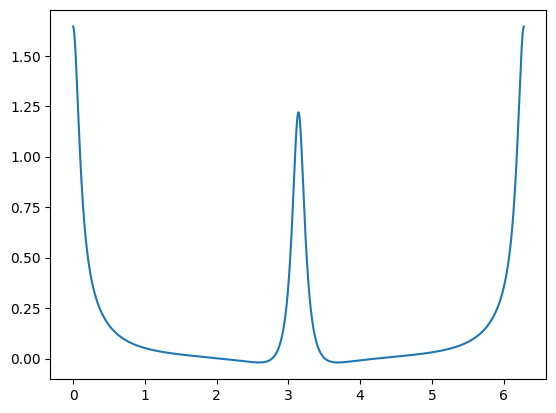

In [25]:
plt.plot(x,f_sym(x,0.8).real+f_asym(x,0.4).real)

In [84]:
from sympy import *

In [85]:
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,n,omega,eta = symbols('theta t alpha n omega eta')
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((a**n*(E**(I*theta))**(2*n-1)),(n,1,6)).doit()
As = Sum((a_s**n*(E**(-I*theta))**(2*n-1)),(n,1,6)).doit()
B = Sum((b**n*(E**(I*theta))**(2*n)),(n,1,6)).doit()
Bs = Sum((b_s**n*(E**(-I*theta))**(2*n)),(n,1,6)).doit()
f = 1/(2*pi) * (1+((A+As)+(B+Bs)))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [86]:
f.diff(t)

(6*a(t)**5*exp(11*I*theta)*Derivative(a(t), t) + 5*a(t)**4*exp(9*I*theta)*Derivative(a(t), t) + 4*a(t)**3*exp(7*I*theta)*Derivative(a(t), t) + 3*a(t)**2*exp(5*I*theta)*Derivative(a(t), t) + 2*a(t)*exp(3*I*theta)*Derivative(a(t), t) + 6*a^*(t)**5*exp(-11*I*theta)*Derivative(a^*(t), t) + 5*a^*(t)**4*exp(-9*I*theta)*Derivative(a^*(t), t) + 4*a^*(t)**3*exp(-7*I*theta)*Derivative(a^*(t), t) + 3*a^*(t)**2*exp(-5*I*theta)*Derivative(a^*(t), t) + 2*a^*(t)*exp(-3*I*theta)*Derivative(a^*(t), t) + 6*b(t)**5*exp(12*I*theta)*Derivative(b(t), t) + 5*b(t)**4*exp(10*I*theta)*Derivative(b(t), t) + 4*b(t)**3*exp(8*I*theta)*Derivative(b(t), t) + 3*b(t)**2*exp(6*I*theta)*Derivative(b(t), t) + 2*b(t)*exp(4*I*theta)*Derivative(b(t), t) + 6*b^*(t)**5*exp(-12*I*theta)*Derivative(b^*(t), t) + 5*b^*(t)**4*exp(-10*I*theta)*Derivative(b^*(t), t) + 4*b^*(t)**3*exp(-8*I*theta)*Derivative(b^*(t), t) + 3*b^*(t)**2*exp(-6*I*theta)*Derivative(b^*(t), t) + 2*b^*(t)*exp(-4*I*theta)*Derivative(b^*(t), t) + exp(2*I*theta)*

In [87]:
col_ = collect(together(f.diff(t)+(f*v).diff(theta)).expand(),E**(1j*theta))

In [88]:
col_

-13*H*a^*(t)**6*exp(-I*alpha)/(4*pi*exp(1.0*I*theta)**13.0) - 7*H*b^*(t)**6*exp(-I*alpha)/(2*pi*exp(1.0*I*theta)**14.0) - 13*H^**a(t)**6*exp(I*alpha)*exp(1.0*I*theta)**13.0/(4*pi) - 7*H^**b(t)**6*exp(I*alpha)*exp(1.0*I*theta)**14.0/(2*pi) + (-11*H*a^*(t)**5*exp(-I*alpha)/(4*pi) - 11*I*omega*a^*(t)**6/(2*pi) + 3*a^*(t)**5*Derivative(a^*(t), t)/pi)/exp(1.0*I*theta)**11.0 + (-3*H*b^*(t)**5*exp(-I*alpha)/pi - 6*I*omega*b^*(t)**6/pi + 3*b^*(t)**5*Derivative(b^*(t), t)/pi)/exp(1.0*I*theta)**12.0 + (-11*H^**a(t)**5*exp(I*alpha)/(4*pi) + 11*I*omega*a(t)**6/(2*pi) + 3*a(t)**5*Derivative(a(t), t)/pi)*exp(1.0*I*theta)**11.0 + (-3*H^**b(t)**5*exp(I*alpha)/pi + 6*I*omega*b(t)**6/pi + 3*b(t)**5*Derivative(b(t), t)/pi)*exp(1.0*I*theta)**12.0 + (-H*exp(-I*alpha)/(2*pi) + H^**b^*(t)**2*exp(I*alpha)/(2*pi) - I*omega*b^*(t)/pi + Derivative(b^*(t), t)/(2*pi))/exp(1.0*I*theta)**2.0 + (-H*a(t)*exp(-I*alpha)/(4*pi) + H^**a^*(t)**2*exp(I*alpha)/(4*pi) - I*omega*a^*(t)/(2*pi) + Derivative(a^*(t), t)/(2*pi))/ex

In [16]:
fa = -I*omega*a + 1/2 *(Hs*a_s*E**(I*alpha)-H*a**2*E**(-I*alpha))

In [18]:
Reals(fa)

TypeError: 'Reals' object is not callable

In [26]:
def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

In [73]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

@jit(nopython=True)
def dZ_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    Z11 = np.conj(a1)
    Z12 = np.conj(a2)
    H1 = Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2
    H2 = Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**2*np.exp(-1j*alpha) )
    db1 = (np.conj(H1)*np.exp(1j*alpha) - H1*b1**2*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H2*a2**2*np.exp(-1j*alpha) )
    db2 = (np.conj(H2)*np.exp(1j*alpha) - H2*b2**2*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,da2.real,da2.imag,db2.real,db2.imag])


@jit(nopython=True)
def dZ2_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,c1real,c1imag,a2real,a2imag,b2real,b2imag,c2real,c2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    c1 = c1real + 1j*c1imag
    c2 = c2real + 1j*c2imag
    
    Z11 = 1/2 * (np.conj(a1)+np.conj(b1)) + eta1/2 * (np.conj(a1)-np.conj(b1))
    Z12 = 1/2 * (np.conj(a2)+np.conj(b2)) + eta2/2 * (np.conj(a2)-np.conj(b2))
    H1 = (Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2)
    H2 = (Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2)
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**3*np.exp(-1j*alpha) )
    db1 = 1/2 *(np.conj(H1)*np.conj(b1)*np.exp(1j*alpha) - H1*b1**3*np.exp(-1j*alpha) )
    dc1 = (np.conj(H1)*np.exp(1j*alpha) - H1*c1**2*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H2*a2**3*np.exp(-1j*alpha) )
    db2 = 1/2 *(np.conj(H2)*np.conj(b2)*np.exp(1j*alpha) - H2*b2**3*np.exp(-1j*alpha) )
    dc2 = (np.conj(H2)*np.exp(1j*alpha) - H2*c2**2*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,dc1.real,dc1.imag,da2.real,da2.imag,db2.real,db2.imag,dc2.real,dc2.imag])


def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

def to_complex2(Zs):
    a1real,a1imag,b1real,b1imag,c1real,c1imag,a2real,a2imag,b2real,b2imag,c2real,c2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    c1 = c1real + 1j*c1imag
    c2 = c2real + 1j*c2imag
    return a1,b1,c1,a2,b2,c2

In [74]:
alpha = 1.2
beta = 0.8
eta1 = 0.2
eta2 = 0.1

In [103]:
t = np.arange(0,5000,0.01)

In [104]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  eta1*0.2 + 0j
b1 =  1 + 0j
a2 =  eta2 * np.sqrt(0.6) + 0j
b2 =  0.6 + 0j

Zs = RK4(dZ_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,a2s,b2s = to_complex(Zs)


In [120]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
c1 = a1**2
a2 =  A2*np.exp(shift*1.0j)
b2 =  a2* np.exp(np.pi*1j)
c2 = a2**2

Zs = RK4(dZ2_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,c1.real,c1.imag,a2.real,a2.imag,b2.real,b2.imag,c2.real,c2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,c1s,a2s,b2s,c2s = to_complex2(Zs)

RZ1 = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1 = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)
RZ2 = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2 = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

R1s = np.abs(RZ1)
R2s = np.abs(RZ2)
Q1s = np.abs(QZ1)
Q2s = np.abs(QZ2)

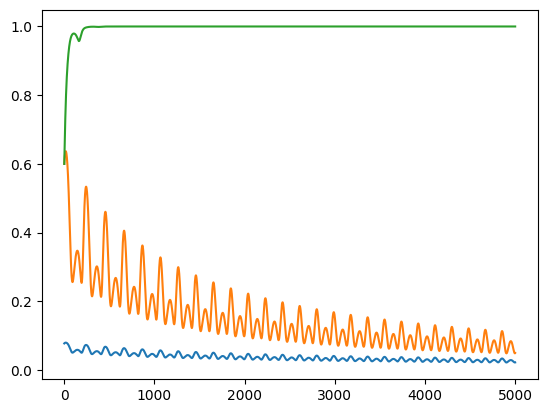

In [122]:
plt.plot(t,R2s)
plt.plot(t,Q2s)
plt.plot(t,np.abs(c2s))

(0.0, 1.0)

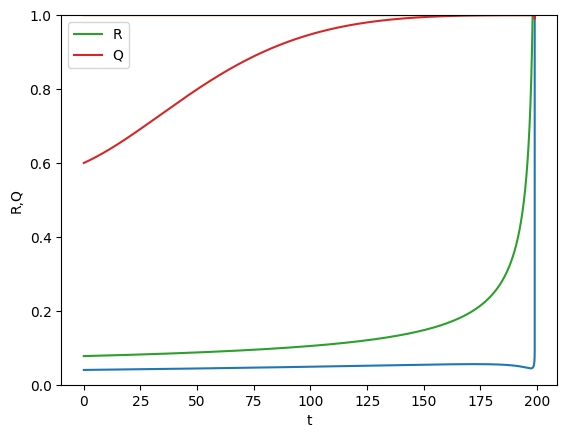

In [105]:
plt.plot(t,np.abs(a1s))
plt.plot(t,np.abs(b1s))

plt.plot(t,np.abs(a2s),label=r'R')
plt.plot(t,np.abs(b2s),label=r'Q')
plt.legend()
plt.ylabel('R,Q')
plt.xlabel('t')
plt.ylim(0,1)

# Phase diagram

In [15]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@jit(nopython=True)
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])


@jit(nopython=True)
def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun3(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

In [135]:
alpha = 1.2
beta = 0.8
eta1 = 0.1
eta2 = 0


In [434]:
def r_00(beta,alpha):
    return np.sqrt(-beta**2+2*np.sin(alpha))/beta

def r_0_l(alpha):
    return np.sqrt(2*np.sin(alpha))

In [431]:
beta_ = np.linspace(0,1,1000)
alpha_ = np.linspace(0,np.pi/2,1000)
AA,BB =  np.meshgrid(alpha_,beta_)
RR = r_00(BB,AA)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/977556993.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/977556993.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/977556993.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta


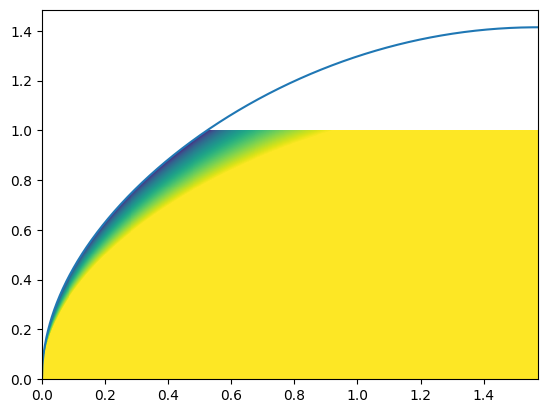

In [435]:
# plt.pcolormesh(AA,BB,RR,vmax=1)
plt.pcolormesh(AA,BB,RR,vmax=np.sqrt(0.6))
plt.plot(alpha_,r_0_l(alpha_))

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/1380831797.py:40: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])


<Figure size 3200x2400 with 0 Axes>

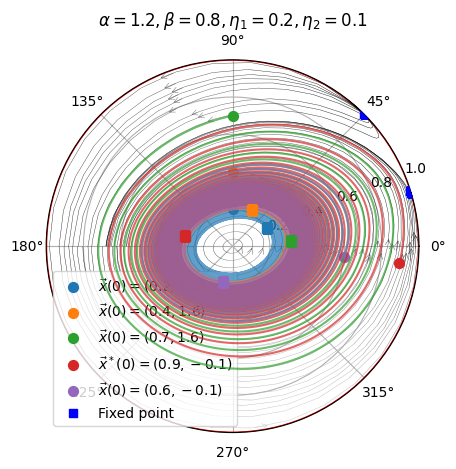

In [141]:

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
plt.figure(dpi=500)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.sca(ax)

u0s = [[0.2,np.pi/2],[0.4,np.pi/2],[0.7,np.pi/2],[0.9,-0.1],[0.6,-0.1]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun2,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],alpha=0.7,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))


xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(0,1.5,200)
y = np.linspace(-np.pi,np.pi,400)
X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.3,broken_streamlines=False,)
ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
ax.axhline(1,color='RED')
plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
plt.legend(loc=3)

plt.tight_layout()


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/3091573415.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/3091573415.py:4: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[-5e-4,0,5e-4])


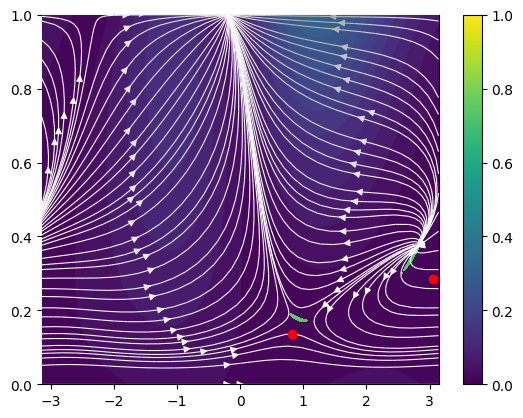

In [106]:

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# plt.sca(ax)
plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=40)
plt.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[-5e-4,0,5e-4])
plt.ylim(0,1.0)
plt.xlim(-np.pi,np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='-|>',cmap = 'gray_r',linewidth=0.8,broken_streamlines=False,)
plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');

plt.colorbar()

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from parfor import parfor
from tqdm.notebook import tqdm

In [4]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [5]:
dr_0eta0 = (beta **2 *eta1**2 * sp.cos(alpha + 2*phi))

In [ ]:
eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi)

In [408]:
dr_0 = dr.subs(eta2,0)


sp.solve(dr_0eta0,phi)

[]

In [157]:
sp.solve(dr,r)[4]

-beta*eta1*(cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha))

In [40]:
dphi.trigsimp()

beta**2*eta2**2*r**2*sin(alpha - 2*phi) + 2*beta*eta1*eta2*r*sin(alpha - phi) + eta1**2*sin(alpha) + (-r**2/2 - 1/2)*(beta**2*eta1**2*sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*sin(alpha + phi) + eta2**2*r**2*sin(alpha))

In [66]:
alpha = 0.5
beta = 0.5
eta1 = 0.2
eta2 = 0.4

In [14]:
def r0_p(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)+np.abs(np.sin(phi))) / (eta2*np.cos(alpha))
    return r0

def r0_m(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)-np.abs(np.sin(phi))) / (eta2*np.cos(alpha))
    return r0

def r0_1(phi,alpha,beta,eta1,eta2):
    return np.ones_like(phi)
def r0_M1(phi,alpha,beta,eta1,eta2):
    return -np.ones_like(phi)
def r0_0(phi,alpha,beta,eta1,eta2):
    return np.zeros_like(phi)

def phi0(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r0 = r(phi,alpha,beta,eta1,eta2)
    dpsi2 = - 1/2 * (1+r0**2)*(eta2**2*r0**2*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha+phi)+beta**2*eta1**2*np.sin(alpha+2*phi))
    dpsi1 = - 1/2 * (2)*(eta1**2*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha-phi)+beta**2*eta2**2*r0**2*np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return dphi    

def F_Jm(r,phi,alpha,beta,eta1,eta2):
    # beta = eta2*r*(-np.cos(alpha+phi) - np.sin(phi))/ (eta1 * np.cos(alpha+2*phi))
    drdr = -r**2*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha)) + r*(1 - r**2)*(2*beta*eta1*eta2*np.cos(alpha + phi) + 2*eta2**2*r*np.cos(alpha))/2 + (1 - r**2)*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha))/2
    drdphi = r*(1 - r**2)*(-2*beta**2*eta1**2*np.sin(alpha + 2*phi) - 2*beta*eta1*eta2*r*np.sin(alpha + phi))/2
    dphidr = 2*beta**2*eta2**2*r*np.sin(alpha - 2*phi) + 2*beta*eta1*eta2*np.sin(alpha - phi) - r*(beta**2*eta1**2*np.sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.sin(alpha + phi) + eta2**2*r**2*np.sin(alpha)) + (-r**2/2 - 1/2)*(2*beta*eta1*eta2*np.sin(alpha + phi) + 2*eta2**2*r*np.sin(alpha))
    dphidphi = -2*beta**2*eta2**2*r**2*np.cos(alpha - 2*phi) - 2*beta*eta1*eta2*r*np.cos(alpha - phi) + (-r**2/2 - 1/2)*(2*beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi))
    J = np.array([[drdr,drdphi],[dphidr,dphidphi]])
    D = np.linalg.det(J)
    tau = np.trace(J)
    discriminant = tau**2 - 4*D
    return np.linalg.det(J),np.trace(J),discriminant
def Linear_analysis(Det,Trace,Delta):
    D_sign = np.sign(Det)
    T_sign = np.sign(Trace)
    Delta_sign = np.sign(Delta)
    if Delta_sign == 1:
        C = 'node'
    elif Delta_sign == -1:
        C = 'spiral'
    else:
        C = 'Degenerate'
    if D_sign == -1:
        return 'Saddle'
    elif D_sign == 0:
        return 'Line/ need to analysis nonlinearity'
    
    if T_sign == 1:
        B = 'Stable'
    elif T_sign == -1:
        B = 'Unstable'
    else:
        return 'Center/ Need to analysis nonlinearity'
    return B + ' ' + C
    


In [74]:
alpha = 0.1
beta = 0.4
eta1 = 0.2
eta2 = 0.1


(0.0, 1.0)

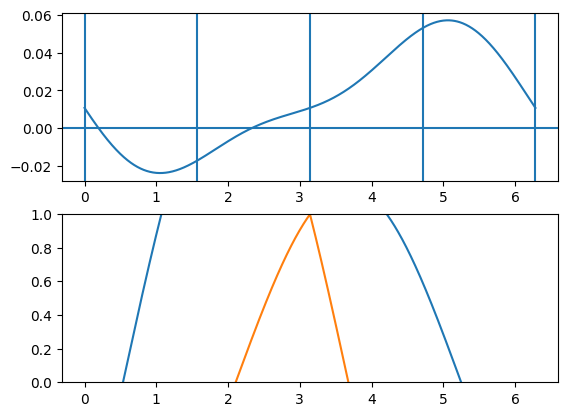

In [9]:
phi = np.linspace(0,np.pi*2,1000)
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

plt.subplot(211)
# plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r0_p))
# plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r0_m))
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r0_1))
# plt.ylim(-1,1)
plt.axvline(0)
plt.axvline(np.pi/2)
plt.axvline(np.pi)
plt.axvline(np.pi/(2/3))
plt.axvline(np.pi/(2/4))


# for phi,r in PHI_R:
    # plt.axvline(phi,color='red')

plt.axhline(0)
# plt.sca(ax)
plt.subplot(212)
plt.plot(phi,r0_p(phi,alpha,beta,eta1,eta2))
plt.plot(phi,r0_m(phi,alpha,beta,eta1,eta2))

plt.ylim(0,1)


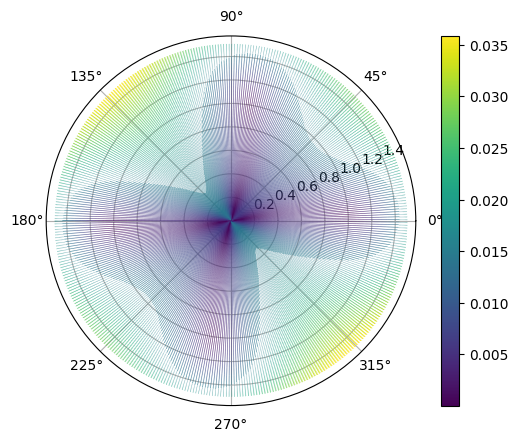

In [313]:

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.sca(ax)
plt.quiver(Y.T,X.T,V.T,U.T,M.T,zorder=3)
plt.colorbar()

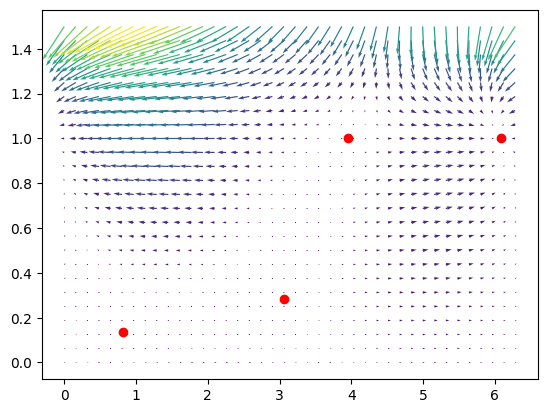

In [109]:
x = np.linspace(0,1.5,25)
y = np.linspace(0,2*np.pi,40)
X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))
plt.quiver(Y.T,X.T,V.T,U.T,M.T,zorder=3)
plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');


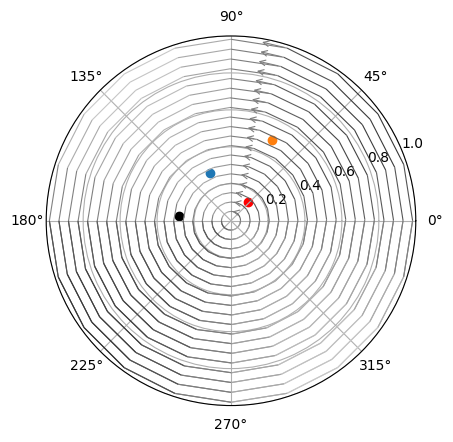

In [300]:
args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

x = np.linspace(0,1.5,2000)


y = np.linspace(-1*np.pi,2*np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
# ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=4,density=1,arrowstyle='-|>',cmap='bwr_r',linewidth=0.8,broken_streamlines=True, start_points=[[3.056311849304119,0.2849894173096539],[0.8188168242829164,0.13702890007537455]])
plt.scatter(3.056311849304119,0.2849894173096539,color='black')
plt.scatter(0.8188168242829164,0.13702890007537455,color='red')

plt.scatter(-4.294879688863771+np.pi*2,0.2838761128315521)
plt.scatter(-5.18698466657402+np.pi*2,0.48911423388218495)

In [139]:
pla =np.where(M.T<5e-5)

일부 부분에서 시뮬레이션과 이론이 맞지 않음 그부분의 원인은 무엇일까?

In [203]:
phi = np.linspace(0,2*np.pi, 10000)
dphi = phi0(phi,alpha,beta,eta1,eta2,r0_p)
s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)
phi[s_check]

array([0.81878092, 3.0558186 , 4.29435827, 5.18665982])

In [263]:
plt.scatter(Y.T[pla],X.T[pla],zorder=3)
plt.scatter(*np.array(PHI_R).T,zorder=2,color='red');
for p in phi[s_check]:
    plt.axvline(p)

IndexError: index 2235 is out of bounds for axis 0 with size 2000

In [ ]:
phis = np.linspace(0,2*np.pi,10000)
# alpha = 0.7
# beta = 0.8
# eta1 = 0.1
# eta2 = 1e-3
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]


In [176]:
alphas = np.linspace(0,np.pi/2,50,endpoint=False)
betas = np.linspace(0,1,51)[1:]
AL,BE = np.meshgrid(alphas,betas)


In [170]:
alpha,beta

(1.2, 0.4)

In [205]:
alpha = 0.1
beta = 0.3
eta1 = 0.2
eta2 = 0.1

In [206]:
PHI_R = []
print('1')
# Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]

phi = np.linspace(0,2*np.pi, 10000)
d_phi = phi[1] - phi[0]

dphi = phi0(phi,alpha,beta,eta1,eta2,r0_1)
s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)

Range = [(phi[s],phi[s]+d_phi) for s in s_check]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_1),bracket=[R_i,R_f])
        J_S = F_Jm(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        PHI_R.append([rot.root,1])
    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('0')
dphi = phi0(phi,alpha,beta,eta1,eta2,r0_0)
s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)

Range = [(phi[s],phi[s]+d_phi) for s in s_check]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_0),bracket=[R_i,R_f])
        r0_0(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        PHI_R.append([rot.root,0])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Plus')
dphi = phi0(phi,alpha,beta,eta1,eta2,r0_p)
s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)

Range = [(phi[s],phi[s]+d_phi) for s in s_check]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_p),bracket=[R_i,R_f])
        r0_p(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        if r0_p(rot.root,alpha,beta,eta1,eta2)>0:
            PHI_R.append([rot.root,r0_p(rot.root,alpha,beta,eta1,eta2)])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Minus')
dphi = phi0(phi,alpha,beta,eta1,eta2,r0_m)
s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)

Range = [(phi[s],phi[s]+d_phi) for s in s_check]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_m),bracket=[R_i,R_f])
        r0_m(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        if r0_m(rot.root,alpha,beta,eta1,eta2)>0:
            PHI_R.append([rot.root,r0_m(rot.root,alpha,beta,eta1,eta2)])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

1
1.0 0.0832927187084307 Unstable node
1.0 2.9585908540249086 Saddle
0
Plus
0.15971358037665165 0.9149429907045074 Saddle
0.7754711866882921 2.827673423606973 Stable node
Minus
-0.15971358037665165 4.056535644294301 Saddle
-0.775471186688292 5.9692660771967665 Stable node


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/3738869449.py:40: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])


<Figure size 3200x2400 with 0 Axes>

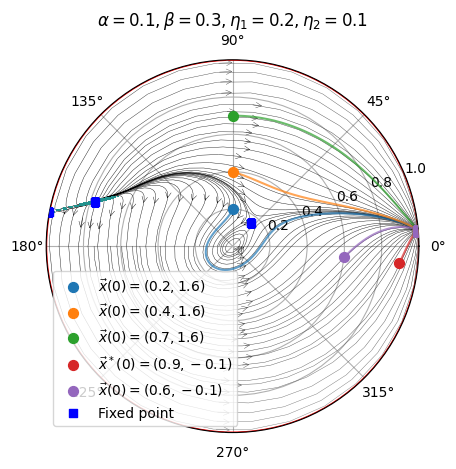

In [207]:
args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
plt.figure(dpi=500)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.sca(ax)

u0s = [[0.2,np.pi/2],[0.4,np.pi/2],[0.7,np.pi/2],[0.9,-0.1],[0.6,-0.1]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun2,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],alpha=0.7,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))


xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(0,1.5,200)
y = np.linspace(-np.pi,np.pi,400)
X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.3,broken_streamlines=False,)
ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
ax.axhline(1,color='RED')
plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
plt.legend(loc=3)

plt.tight_layout()


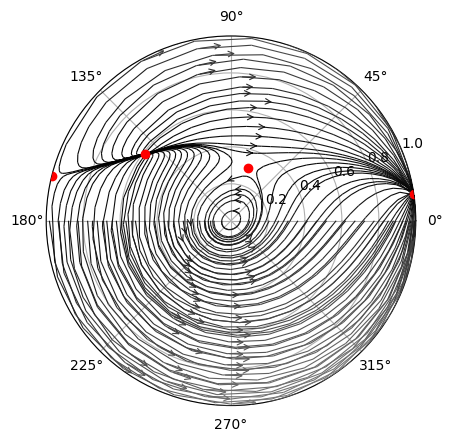

In [114]:
args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

x = np.linspace(0,1.5,2000)


y = np.linspace(-1*np.pi,2*np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
# ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=4,density=1,arrowstyle='-|>',cmap='bwr_r',linewidth=0.8,broken_streamlines=True, start_points=PHI_R)
plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');

In [ ]:
plt.pcolormesh(alphas,betas,np.array(RR))

In [276]:


def get_R_phis(alphas,betas,eta1,eta2,R0,Pi,Pf):
    RR,PPhi,TT = [],[],[]
    for beta in tqdm(betas):
        @parfor(alphas,args=(beta,eta1,eta2,R0,Pi,Pf),bar=False)
        def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
            # for R_i,R_f in Range:
            try:
                rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
                R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
                J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
                LA = Linear_analysis(*J_S)

                # print(R,',',phi,Linear_analysis(*J_S))
                return R,phi,LA
            except ValueError:
                return np.nan,np.nan,np.nan
            
        R,Phi,Type = zip(*get_R_phi)
        RR.append(R)
        PPhi.append(Phi)
        TT.append(Type)
    RR,PPhi,TT  = map(np.array,[RR,PPhi,TT])
    return RR,PPhi,TT

(0.5, 0.5, 0.2, 0.4)

In [181]:
x = np.linspace(0,1.5,10000)
y = np.linspace(0,2*np.pi,10000)
X,Y = np.meshgrid(x,y)
U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))


In [192]:
pla =np.where(M<5e-5) 

In [241]:
alpha,beta,eta1,eta2

(0.5, 0.5, 0.2, 0.4)

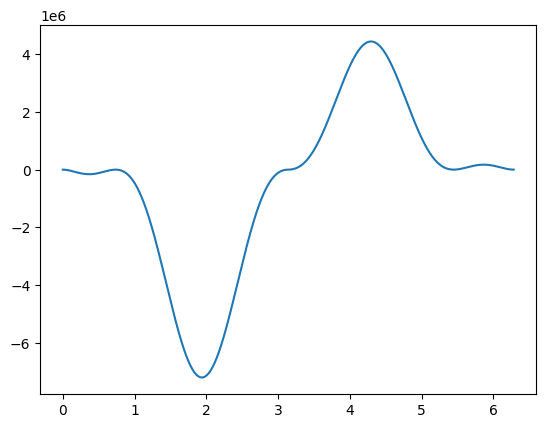

In [347]:
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,Fr_sol))

In [326]:
from scipy.optimize import fixed_point

In [352]:
phi = np.linspace(0,2*np.pi, 80000)
dphi = phi[1] - phi[0]
dphi

7.854079809972108e-05

In [55]:
alpha = 1.2
beta = 0.9
eta1 = 0.2
eta2 = 0.1

In [56]:
def get_RP(alpha,beta,eta1,eta2,Fr_sol):
    phi = np.linspace(0,2*np.pi, 10000)
    d_phi = phi[1] - phi[0]

    dphi = phi0(phi,alpha,beta,eta1,eta2,Fr_sol)
    s_check, = np.where(np.sign(dphi[1:] * dphi[:-1]) == -1)

    Range = [(phi[s],phi[s]+d_phi) for s in s_check]
    PHI_R = []
    state = []

    for R_i,R_f in Range:
        # print(phi0(R_i,alpha,beta,eta1,eta2,Fr_sol),phi0(R_f,alpha,beta,eta1,eta2,Fr_sol))
        try:
            rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,Fr_sol),method='ridder',bracket=[R_i,R_f])
            phi_sol = rot.root %(np.pi*2)
            r_sol = Fr_sol(phi_sol,alpha,beta,eta1,eta2)
            J_S = F_Jm(r_sol,phi_sol,alpha,beta,eta1,eta2)
            LA = Linear_analysis(*J_S)
            # print(r_sol,phi_sol,LA)
            PHI_R.append([phi_sol,r_sol])
            state.append(LA)
        except ValueError:
            pass
    return PHI_R,state

In [98]:
get_RP(alpha,beta,eta1,eta2,r0_p)

([[0.2822552949095577, 1.3758567724330146],
  [2.9878706070521432, 1.6660973447218523]],
 ['Unstable spiral', 'Saddle'])

In [99]:
get_RP(alpha,beta,eta1,eta2,r0_m)

([[3.42384794849935, -1.375856772433008],
  [6.129463260641936, -1.6660973447218548]],
 ['Unstable spiral', 'Saddle'])

In [100]:
get_RP(alpha,beta,eta1,eta2,r0_0)

([], [])

In [101]:
get_RP(alpha,beta,eta1,eta2,r0_1)

([], [])

In [156]:
alpha_ = np.linspace(0,np.pi/2,200)
beta_ = np.linspace(0,1,200)
AA,BB = np.meshgrid(alpha_,beta_)
CC1 = np.nan * np.ones_like(AA)
CCP = np.nan * np.ones_like(AA)
CCM = np.nan * np.ones_like(AA)


In [157]:
CC1O = np.nan * np.ones_like(AA)


In [190]:
AA,BB = np.meshgrid(alpha_,beta_)

In [192]:
CC1len = np.nan * np.ones_like(AA)


In [158]:
CCS = np.nan * np.ones_like(AA)
CCSO = np.nan * np.ones_like(AA)


In [159]:
CC[99,199]

NameError: name 'CC' is not defined

In [191]:
sols = []
cons = []
ALP = []
for i,a in enumerate(alpha_):
    AA1 = []
    BB1 = []
    Al = []
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_1)
        AA1.append(A)
        BB1.append(B)
        if 'Stable node' in B:
            CC1[j,i] = 1
        Al.append(a)
    sols.append(AA1)
    cons.append(BB1) 
    ALP.append(Al)

In [182]:
sols[0][-1]

[[2.49809154479751, array(1.)],
 [3.1415926535907945, array(1.)],
 [3.785093762382076, array(1.)]]

In [188]:
CC1len[j,i]

IndexError: index 0 is out of bounds for axis 1 with size 0

In [193]:

for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        ch =np.array(sols[i][j])
        kind = np.array(cons[i][j])
        CC1len[j,i] = len(ch)

In [194]:
CC1L = np.where(CC1len==0,np.nan,CC1len)

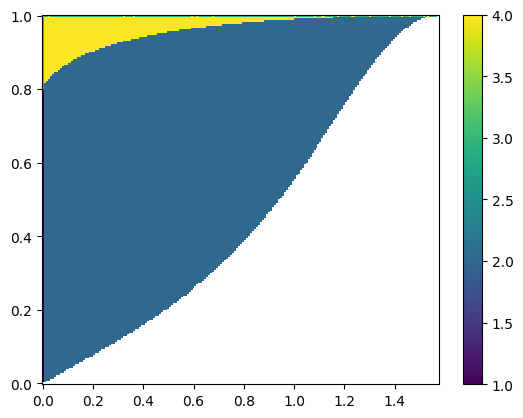

In [196]:
plt.pcolormesh(AA,BB,CC1L)
plt.colorbar()

In [162]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_p)
        sols.append(A)
        cons.append(B)
        if 'Stable node' in B:
            ch = [A[k][1] for k,B_ in enumerate(B) if B_ == 'Stable node']
            CCP[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,np.nan))
            CC1O[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,np.nan))


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/2823891514.py:11: RuntimeWarning: All-NaN slice encountered
  CC1O[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,np.nan))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/2823891514.py:10: RuntimeWarning: All-NaN slice encountered
  CCP[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,np.nan))


In [163]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_p)
        sols.append(A)
        cons.append(B)
        S = CCS[j,i]
        SO = CCSO[j,i]
        if ('Saddle' in B):
            ch = [A[k][1] for k,B_ in enumerate(B) if B_ == 'Saddle']

            CCS[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,S))
            CCSO[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,SO))


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/193910305.py:13: RuntimeWarning: All-NaN slice encountered
  CCS[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,S))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/193910305.py:14: RuntimeWarning: All-NaN slice encountered
  CCSO[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,SO))


In [166]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_m)
        sols.append(A)
        cons.append(B)
        S = CCS[j,i]
        SO = CCSO[j,i]
        if ('Saddle' in B):
            ch = [A[k][1] for k,B_ in enumerate(B) if B_ == 'Saddle']
            C = np.where((np.array(ch)<1)&(np.array(ch)>0))
            CCS[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,S))
            CCSO[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,SO))

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/1378963823.py:14: RuntimeWarning: All-NaN slice encountered
  CCSO[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,SO))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/1378963823.py:13: RuntimeWarning: All-NaN slice encountered
  CCS[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,S))


In [ ]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_m)
        sols.append(A)
        cons.append(B)
        if 'Stable node' in B:
            ch = [A[k][1] for k,B_ in enumerate(B) if B_ == 'Stable node']
            CCM[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,np.nan))
            CC1O[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,np.nan))


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/3240045253.py:10: RuntimeWarning: All-NaN slice encountered
  CCM[j,i] = np.nanmax(np.where((np.array(ch)<1)&(np.array(ch)>0),ch,np.nan))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/3240045253.py:11: RuntimeWarning: All-NaN slice encountered
  CC1O[j,i] = np.nanmin(np.where(np.array(ch)>1,ch,np.nan))


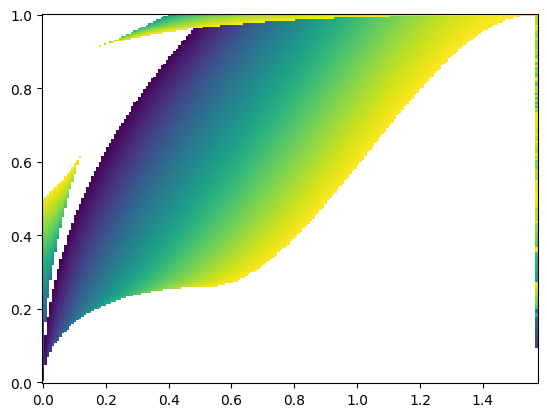

In [168]:
plt.pcolormesh(AA,BB,CCS,vmin=0,vmax=1)

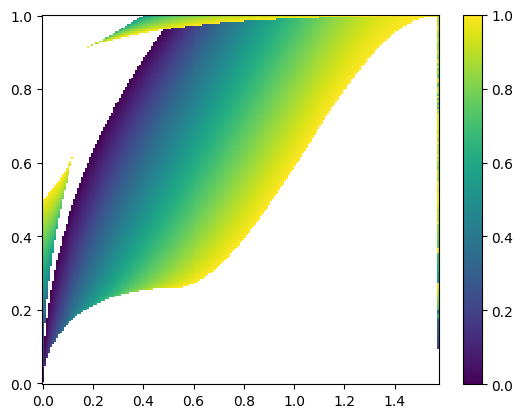

In [169]:
# plt.pcolormesh(AA,BB,CC1O,vmin=0,vmax=1)
plt.pcolormesh(AA,BB,CCS,vmin=0,vmax=1)
# plt.pcolormesh(AA,BB,CCSO,vmin=0,vmax=1)
# plt.pcolormesh(AA,BB,CCM,vmin=0,vmax=1)
# plt.pcolormesh(AA,BB,CCP,vmin=0,vmax=1)
plt.colorbar()

In [523]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_m)
        sols.append(A)
        cons.append(B)
        if 'Stable node' in B:
            ch = [A[k][0] for k,B_ in enumerate(B) if B_ == 'Stable node']
            CCM[j,i] = np.nanmin(np.where(np.abs(ch)<1,ch,np.nan))


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/1358969689.py:10: RuntimeWarning: All-NaN slice encountered
  CCM[j,i] = np.nanmin(np.where(np.abs(ch)<1,ch,np.nan))


In [500]:
sols = []
cons = []
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        A,B = get_RP(a,b,eta1,eta2,r0_0)
        sols.append(A)
        cons.append(B)
        if 'Stable node' in B:
            CC0[j,i] = 1


In [491]:
AA,BB =  np.meshgrid(alpha_,beta_)
RR = r_00(BB,AA)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/3743960052.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/3743960052.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_76006/3743960052.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta


In [497]:
np.nanmax(RR)

inf

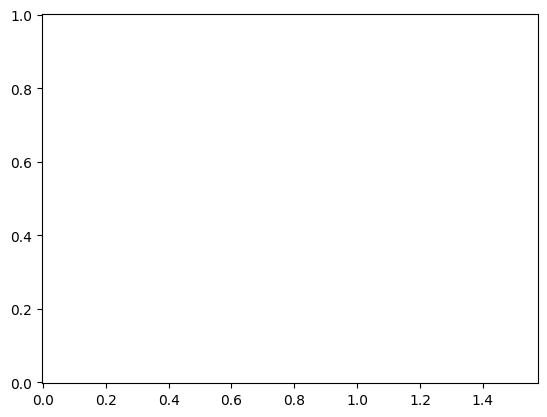

In [502]:
plt.pcolormesh(AA,BB,CC0)

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_37881/176275450.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Text(0, 0.5, '$\\beta$')

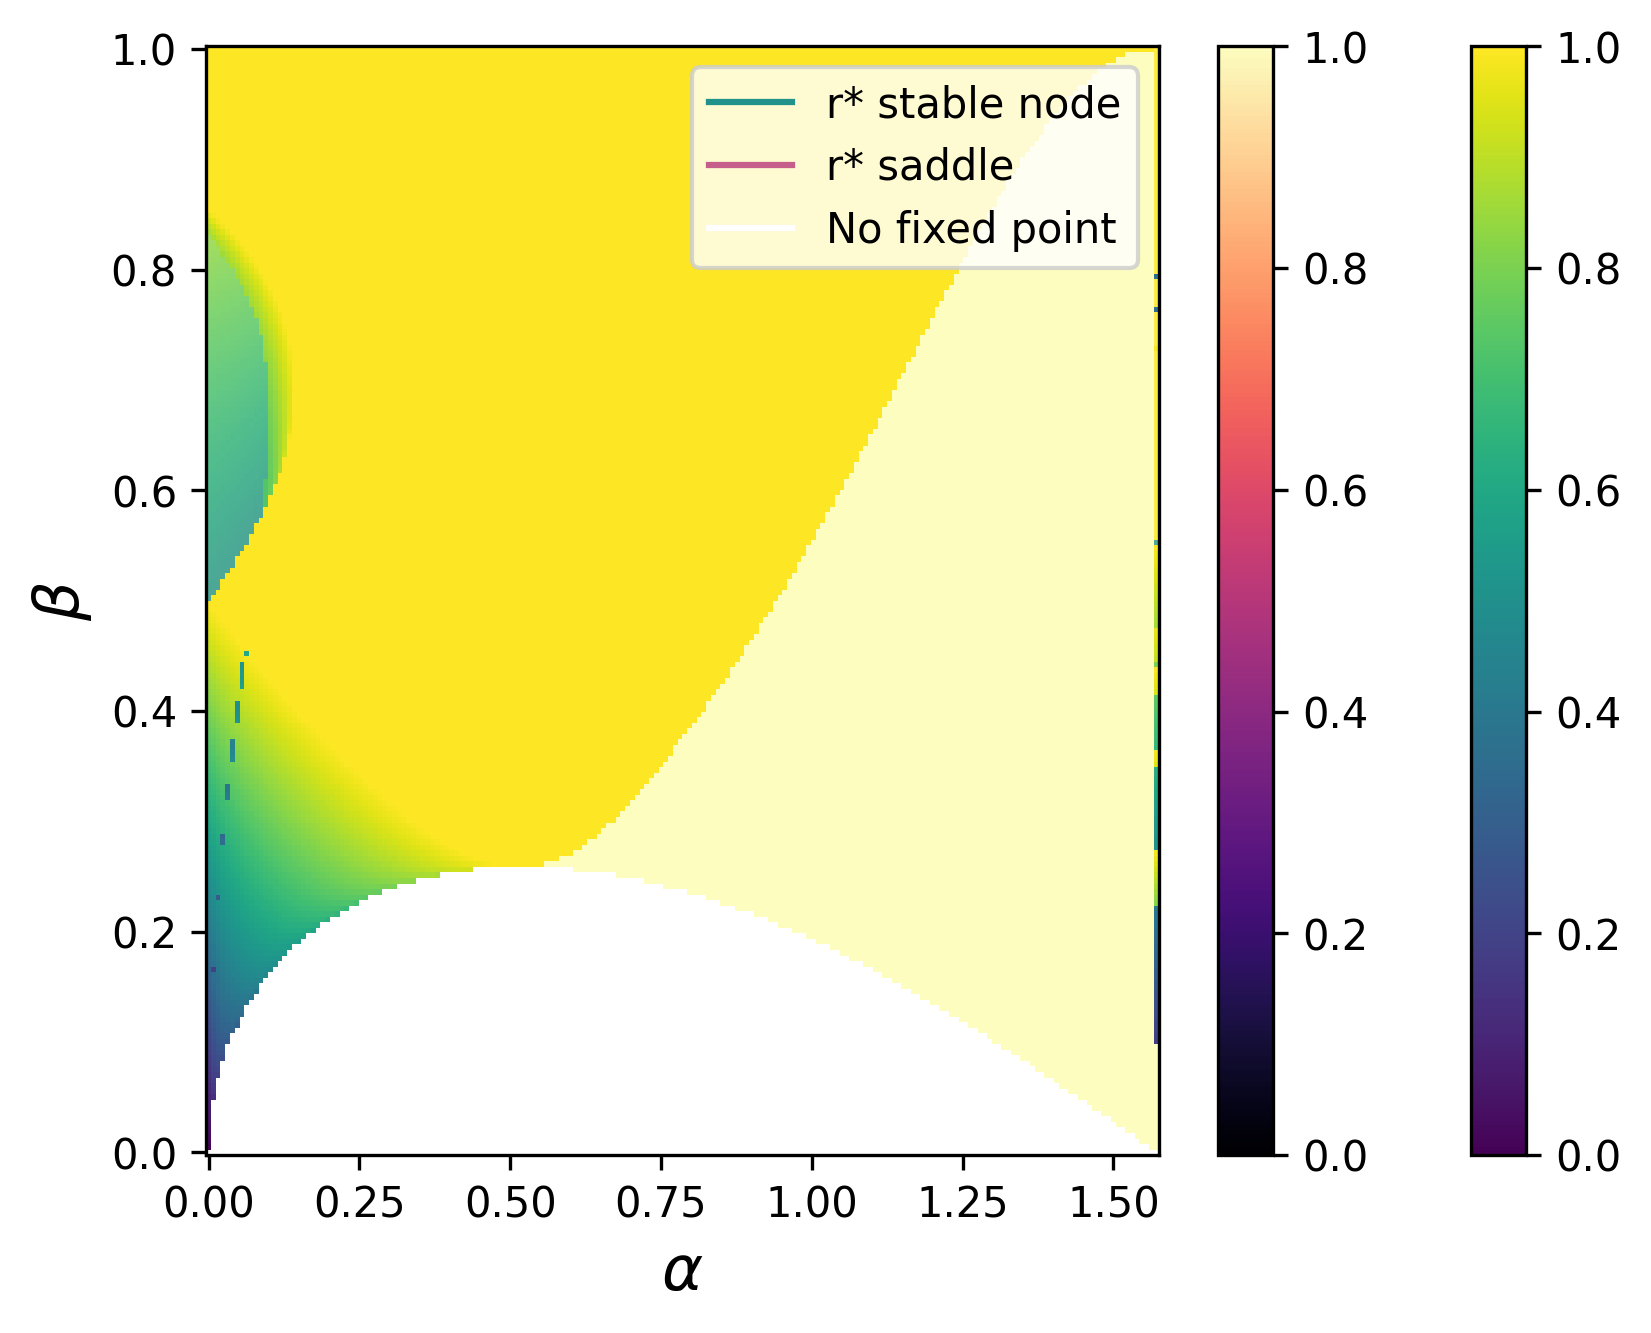

In [148]:

plt.figure(dpi=300)
cm1 = plt.pcolormesh(AA,BB,CCSO,vmin=0,vmax=1,cmap='magma')
plt.pcolormesh(AA,BB,CC1O,vmin=0,vmax=2,alpha=0.8,label='r≠1 stable node')
# cm1 = plt.pcolormesh(AA,BB,CCS,vmin=0,vmax=2,alpha=0.8,cmap='magma',label='r≠1 saddle')
plt.pcolormesh(AA,BB,CCP,vmin=0,vmax=1,alpha=1)
plt.pcolormesh(AA,BB,CCM,vmin=0,vmax=1,alpha=1)
cm2 = plt.pcolormesh(AA,BB,CC1,vmin=0,vmax=1,label='r=1 stable node')

plt.colorbar(cm2)
plt.colorbar(cm1)
plt.plot(np.nan,np.nan,color=plt.cm.viridis(0.5),label='r* stable node')
plt.plot(np.nan,np.nan,color=plt.cm.magma(0.5),alpha=0.8,label='r* saddle')
plt.plot(np.nan,np.nan,color=plt.cm.bwr(0.5),label='No fixed point')
plt.legend()
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel(r'$\beta$',fontsize=15)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (40000,) + inhomogeneous part.

In [471]:
cons_ten = np.array(cons).reshape(*CC.shape,-1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (40000,) + inhomogeneous part.

In [465]:
CC_ = np.where(cons_ten =='Stable node',1,np.nan)

In [467]:
CC_

array([[[nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        ...,
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.]],

       [[nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        ...,
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.]],

       [[nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        ...,
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.]],

       ...,

       [[nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        ...,
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.]],

       [[nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        ...,
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.],
        [nan,  1., nan,  1.]],

       [[nan

In [461]:
for i,a in enumerate(alpha_):
    for j,b in enumerate(beta_):
        cc = np.array(cons_ten[i][j])
        if 'stable node' in cc:
            CC[i,j] = 1

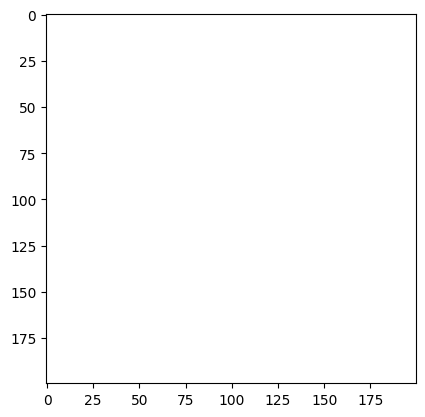

In [462]:
plt.imshow(CC)

In [450]:
np.where(CC=='stable node')

(array([], dtype=int64), array([], dtype=int64))

In [ ]:


def sol_R_phi():


In [ ]:
PHI_R = []
print('1')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_1),bracket=[R_i,R_f])
        J_S = F_Jm(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        PHI_R.append([rot.root,1])
    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('0')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_0),bracket=[R_i,R_f])
        r0_0(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        PHI_R.append([rot.root,0])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Plus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_p),bracket=[R_i,R_f])
        r0_p(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        if r0_p(rot.root,alpha,beta,eta1,eta2)>0:
            PHI_R.append([rot.root,r0_p(rot.root,alpha,beta,eta1,eta2)])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Minus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_m),bracket=[R_i,R_f])
        r0_m(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,beta,eta1,eta2)
        print(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))
        if r0_m(rot.root,alpha,beta,eta1,eta2)>0:
            PHI_R.append([rot.root,r0_m(rot.root,alpha,beta,eta1,eta2)])

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

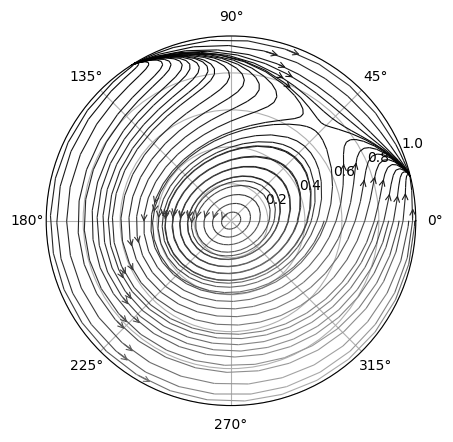

In [390]:
args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

x = np.linspace(0,1.5,2000)


y = np.linspace(0,2*np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
# ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=4,density=1,arrowstyle='-|>',cmap='bwr_r',linewidth=0.8,broken_streamlines=True, start_points=PHI_R)
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');

In [225]:
from matplotlib.colors import LogNorm

In [ ]:
plt.cm.viridis_r

In [239]:
PHI_R

[[3.956620728380154, 1],
 [6.086556374686155, 1],
 [0.8188168242829164, 0.13702890007537455],
 [3.056311849304119, 0.2849894173096539]]

In [294]:
x = np.linspace(0,1.5,2000)
y = np.linspace(0,2*np.pi,2000)
X,Y = np.meshgrid(x,y)
U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

pla =np.where(M<1e-5) 

In [290]:
M.min()

0.019985699230408

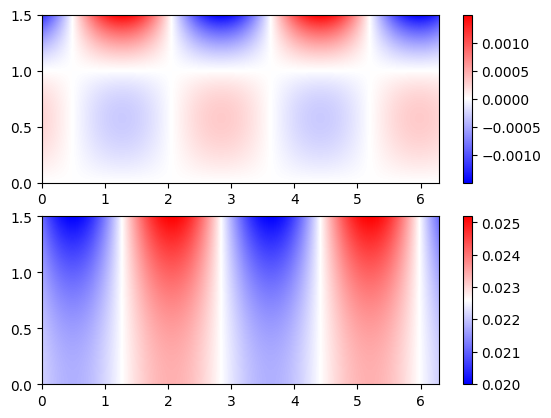

In [299]:
plt.subplot(211)
plt.pcolormesh(Y.T,X.T,U.T,cmap='bwr')
plt.colorbar()
plt.subplot(212)

plt.pcolormesh(Y.T,X.T,V.T,cmap='bwr')
plt.colorbar()


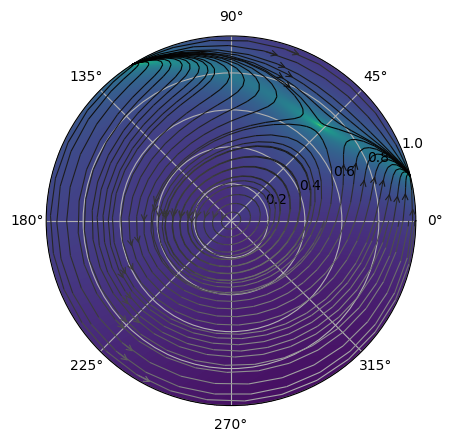

In [392]:



args = beta,alpha,eta1,eta2
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

x = np.linspace(0,1.5,2000)
y = np.linspace(0,2*np.pi,4000)

X,Y = np.meshgrid(x,y)

U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

# plt.sca(ax)
ax = plt.gca()
plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.8,broken_streamlines=False,)
plt.pcolormesh(Y.T,X.T,M.T,norm=LogNorm(vmin=M.min(), vmax=M.max()),cmap='viridis_r')
# ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=4,density=1,arrowstyle='-|>',cmap='bwr_r',linewidth=0.8,broken_streamlines=True, start_points=PHI_R)
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='red');

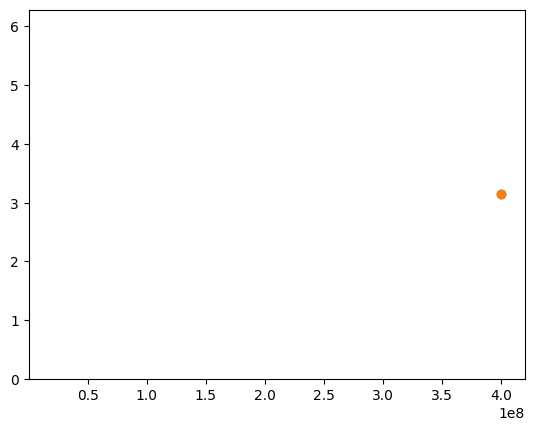

In [286]:
plt.pcolormesh(X.T,Y.T,M.T,norm=LogNorm(vmin=M.min(), vmax=M.max()),cmap='viridis_r')
for P in PHI_R:
    plt.scatter(P[1],P[0])
# for p in phi[s_check]:
#     # plt.axvline(p)
#     plt.scatter(r0_p(p,alpha,beta,eta1,eta2),p,color='blue')

In [254]:
x = np.linspace(0,1.5,5000)
y = np.linspace(0,2*np.pi,5000)
X,Y = np.meshgrid(x,y)
U,V = myFun3([X,Y],0,args)
M = (np.hypot(U,V))

pla =np.where(M<1e-5) 

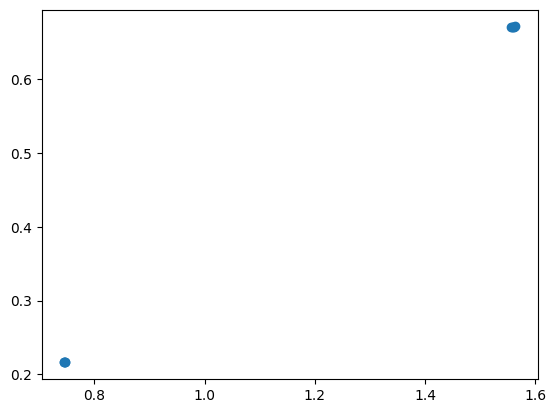

In [257]:
plt.scatter(Y.T[pla],X.T[pla],zorder=3)


(0.0, 1.041094313351267)

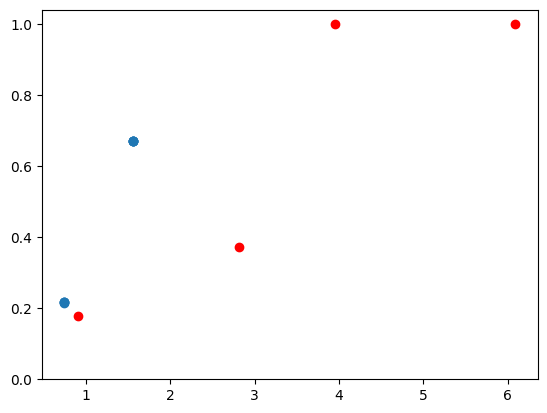

In [258]:
plt.scatter(Y.T[pla],X.T[pla],zorder=3)
# plt.scatter(*np.array(PHI_R).T,zorder=2,color='red');
for P in PHI_R:
    plt.scatter(P[0],P[1],color='red')
plt.ylim(0,)